In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../artifacts/sentiment_analysis.csv", encoding="ISO-8859-1")

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
len(data['tweet'])

7920

## Explotary Data Analysis

### Data Preprocessing

In [5]:
## check the dataset shape

In [6]:
data.shape

(7920, 3)

In [7]:
## check the duplicate entries

In [8]:
data.duplicated().sum()

0

In [9]:
## check the null values of the dataset

In [10]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

#### Text Preprocessing

In [11]:
import re
import string

In [12]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [13]:
## Convert uppercase into lowercase

In [14]:
data['tweet']=data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [16]:
## Remove the links

In [17]:
data['tweet']=data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','', x,flags=re.MULTILINE) for x in x.split()))

In [18]:
data['tweet']

0       #fingerprint #pregnancy test  #android #apps #...
1       finally a transparant silicon case ^^ thanks t...
2       we love this! would you go? #talk #makememorie...
3       i'm wired i know i'm george i was made that wa...
4       what amazing service! apple won't even talk to...
                              ...                        
7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, Length: 7920, dtype: object

In [19]:
## Remove punctuations

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text =text.replace(punctuation, '')
    return text
    
data["tweet"]= data["tweet"].apply(remove_punctuations) 


In [22]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [23]:
## Remove the numbers from the text

In [24]:
data["tweet"]=data["tweet"].str.replace('/d+','', regex=True)

In [25]:
data["tweet"].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [26]:
## Remove stop words

In [27]:
import nltk

In [28]:
nltk.download('stopwords', download_dir='../static/model/')

[nltk_data] Downloading package stopwords to ../static/model/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
with open ('../static/model/corpora/stopwords/english', 'r') as file:
    sw=file.read().splitlines()

In [30]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
data["tweet"]= data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [32]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [33]:
## stemming

In [34]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()


In [35]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [36]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [37]:
## print the training dataset

In [38]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love 90 year old neighbor ipad morn made ...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building the vocabulary

In [39]:
from  collections import Counter
vocab = Counter()

In [40]:
vocab

Counter()

In [41]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [42]:
len(vocab)

16320

In [43]:
data.shape

(7920, 3)

In [44]:
tokens = [key for key in vocab if vocab[key]>10]

In [45]:
len(tokens)

1194

In [46]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')


In [47]:
## Divide the dataset

In [48]:
x= data['tweet']
y=data['label']

In [49]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love 90 year old neighbor ipad morn made ...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [50]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
x_train.shape

(6336,)

In [53]:
x_test.shape

(1584,)

In [54]:
## convert the text into numerical values

In [55]:
import numpy as np

def vectorizer(ds, vocabulary):
    vectorizer_list = []
    vocab_set = set(vocabulary)  # Use a set for faster lookup
    
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary), dtype=np.float16)  # Use np.float16 to reduce memory usage
        sentence_words = set(sentence.split())  # Split and convert sentence to a set to speed up membership checking
        
        for i, word in enumerate(vocabulary):
            if word in sentence_words:  # Check if word exists in the sentence
                sentence_list[i] = 1
                
        vectorizer_list.append(sentence_list)
    
    # Convert the list to a numpy array only once
    vectorizer_list_new = np.asarray(vectorizer_list, dtype=np.float16)
    
    return vectorizer_list_new


In [56]:
vectorized_x_train = vectorizer(x_train, tokens)

In [57]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [58]:
vectorized_x_test = vectorizer(x_test,tokens)

In [59]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [60]:
## check the value counts of the y_train

In [61]:
y_train.value_counts()

label
0    4742
1    1594
Name: count, dtype: int64

In [62]:
vectorized_x_train.shape

(6336, 1194)

In [63]:
y_train.shape

(6336,)

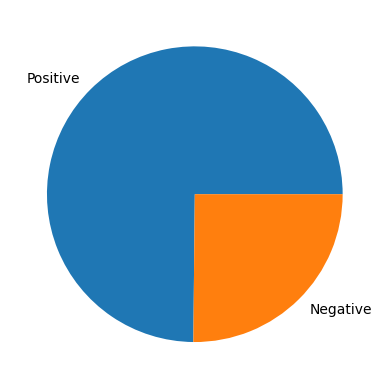

In [64]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=["Positive","Negative"])
plt.show()

## Handling the Imbalance Dataset

In [65]:
! pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from imblearn.over_sampling import SMOTE
smote =SMOTE()
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9484, 1194) (9484,)


In [67]:
y_train_smote.value_counts()

label
0    4742
1    4742
Name: count, dtype: int64

In [68]:
y_train_smote

0       0
1       0
2       1
3       0
4       1
       ..
9479    1
9480    1
9481    1
9482    1
9483    1
Name: label, Length: 9484, dtype: int64

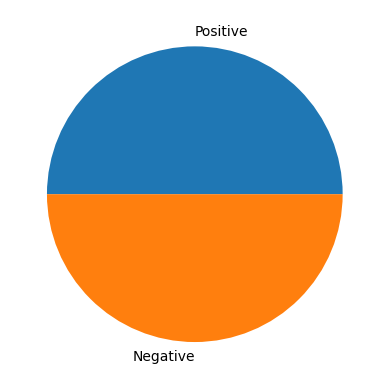

In [69]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]), labels=['Positive','Negative'])
plt.show()

## Model Training And Model Evaluvation

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Logistic Regression

In [71]:
lr =LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

LogisticRegression()

In [72]:
y_train_pred= lr.predict(vectorized_x_train_smote)
y_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [73]:
y_train_smote

0       0
1       0
2       1
3       0
4       1
       ..
9479    1
9480    1
9481    1
9482    1
9483    1
Name: label, Length: 9484, dtype: int64

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
print("Accuracy \t", accuracy_score(y_train_smote,y_train_pred) )
print("confusion matrix \n\t",confusion_matrix(y_train_smote, y_train_pred))
print("classification report ", classification_report(y_train_smote,y_train_pred))
    

Accuracy 	 0.9410586250527204
confusion matrix 
	 [[4310  432]
 [ 127 4615]]
classification report                precision    recall  f1-score   support

           0       0.97      0.91      0.94      4742
           1       0.91      0.97      0.94      4742

    accuracy                           0.94      9484
   macro avg       0.94      0.94      0.94      9484
weighted avg       0.94      0.94      0.94      9484



In [76]:
y_test_pred = lr.predict(vectorized_x_test)
y_test_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [77]:
print("Accuracy \t", accuracy_score(y_test,y_test_pred) )
print("confusion matrix \n\t",confusion_matrix(y_test, y_test_pred))
print("classification report ", classification_report(y_test,y_test_pred))
    

Accuracy 	 0.8724747474747475
confusion matrix 
	 [[1011  141]
 [  61  371]]
classification report                precision    recall  f1-score   support

           0       0.94      0.88      0.91      1152
           1       0.72      0.86      0.79       432

    accuracy                           0.87      1584
   macro avg       0.83      0.87      0.85      1584
weighted avg       0.88      0.87      0.88      1584



In [78]:
## cross validation score for logistic regression

In [79]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds (can be adjusted based on dataset size)
cv_scores = cross_val_score(lr,vectorized_x_train_smote, y_train_smote, cv=10)

# Print cross-validation scores and their average
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.86090622 0.90832455 0.87565859 0.92413066 0.92088608 0.93565401
 0.91350211 0.93037975 0.92721519 0.92827004]
Average cross-validation score: 0.9124927194070596


## Naive Bayes 

In [80]:
nb = MultinomialNB()
nb.fit(vectorized_x_train_smote,y_train_smote)

MultinomialNB()

In [81]:
y_train_pred= nb.predict(vectorized_x_train_smote)
y_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [82]:
y_train_smote

0       0
1       0
2       1
3       0
4       1
       ..
9479    1
9480    1
9481    1
9482    1
9483    1
Name: label, Length: 9484, dtype: int64

In [83]:
print("Accuracy \t", accuracy_score(y_train_smote,y_train_pred) )
print("confusion matrix \n\t",confusion_matrix(y_train_smote, y_train_pred))
print("classification report ", classification_report(y_train_smote,y_train_pred))

Accuracy 	 0.9033108393083087
confusion matrix 
	 [[4040  702]
 [ 215 4527]]
classification report                precision    recall  f1-score   support

           0       0.95      0.85      0.90      4742
           1       0.87      0.95      0.91      4742

    accuracy                           0.90      9484
   macro avg       0.91      0.90      0.90      9484
weighted avg       0.91      0.90      0.90      9484



In [84]:
y_test_pred = nb.predict(vectorized_x_test)
y_test_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [85]:
print("Accuracy \t", accuracy_score(y_test,y_test_pred) )
print("confusion matrix \n\t",confusion_matrix(y_test, y_test_pred))
print("classification report ", classification_report(y_test,y_test_pred))

Accuracy 	 0.8813131313131313
confusion matrix 
	 [[999 153]
 [ 35 397]]
classification report                precision    recall  f1-score   support

           0       0.97      0.87      0.91      1152
           1       0.72      0.92      0.81       432

    accuracy                           0.88      1584
   macro avg       0.84      0.89      0.86      1584
weighted avg       0.90      0.88      0.89      1584



In [86]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds (can be adjusted based on dataset size)
cv_scores = cross_val_score(nb,vectorized_x_train_smote, y_train_smote, cv=10)

# Print cross-validation scores and their average
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.87038988 0.91148577 0.87671233 0.90094837 0.90189873 0.89978903
 0.89662447 0.88607595 0.90822785 0.9092827 ]
Average cross-validation score: 0.8961435088234115


## DecisionTreeClassifier

In [87]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(vectorized_x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [88]:
y_train_pred = dt_clf.predict(vectorized_x_train_smote)
y_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
print("Accuracy \t", accuracy_score(y_train_smote,y_train_pred) )
print("confusion matrix \n\t",confusion_matrix(y_train_smote, y_train_pred))
print("classification report ", classification_report(y_train_smote,y_train_pred))

Accuracy 	 0.9995782370307887
confusion matrix 
	 [[4742    0]
 [   4 4738]]
classification report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4742
           1       1.00      1.00      1.00      4742

    accuracy                           1.00      9484
   macro avg       1.00      1.00      1.00      9484
weighted avg       1.00      1.00      1.00      9484



In [90]:
y_test_pred = dt_clf.predict(vectorized_x_test)
y_test_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [91]:
print("Accuracy \t", accuracy_score(y_test,y_test_pred) )
print("confusion matrix \n\t",confusion_matrix(y_test, y_test_pred))
print("classification report ", classification_report(y_test,y_test_pred))

Accuracy 	 0.8112373737373737
confusion matrix 
	 [[1009  143]
 [ 156  276]]
classification report                precision    recall  f1-score   support

           0       0.87      0.88      0.87      1152
           1       0.66      0.64      0.65       432

    accuracy                           0.81      1584
   macro avg       0.76      0.76      0.76      1584
weighted avg       0.81      0.81      0.81      1584



In [92]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds (can be adjusted based on dataset size)
cv_scores = cross_val_score(dt_clf,vectorized_x_train_smote, y_train_smote, cv=10)

# Print cross-validation scores and their average
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.73234984 0.73340358 0.79135933 0.85353003 0.93670886 0.92721519
 0.91877637 0.93248945 0.92616034 0.92510549]
Average cross-validation score: 0.8677098478078191


## RandomForestClassifier

In [93]:
rf_clf = RandomForestClassifier()
rf_clf.fit(vectorized_x_train_smote,y_train_smote)

RandomForestClassifier()

In [94]:
y_train_pred = rf_clf.predict(vectorized_x_train_smote)
y_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [95]:
print("Accuracy \t", accuracy_score(y_train_smote,y_train_pred) )
print("confusion matrix \n\t",confusion_matrix(y_train_smote, y_train_pred))
print("classification report ", classification_report(y_train_smote,y_train_pred))

Accuracy 	 0.9995782370307887
confusion matrix 
	 [[4740    2]
 [   2 4740]]
classification report                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4742
           1       1.00      1.00      1.00      4742

    accuracy                           1.00      9484
   macro avg       1.00      1.00      1.00      9484
weighted avg       1.00      1.00      1.00      9484



In [96]:
y_test_pred = rf_clf.predict(vectorized_x_test)
y_test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [97]:
print("Accuracy \t", accuracy_score(y_test,y_test_pred) )
print("confusion matrix \n\t",confusion_matrix(y_test, y_test_pred))
print("classification report ", classification_report(y_test,y_test_pred))

Accuracy 	 0.8693181818181818
confusion matrix 
	 [[1058   94]
 [ 113  319]]
classification report                precision    recall  f1-score   support

           0       0.90      0.92      0.91      1152
           1       0.77      0.74      0.76       432

    accuracy                           0.87      1584
   macro avg       0.84      0.83      0.83      1584
weighted avg       0.87      0.87      0.87      1584



In [98]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds (can be adjusted based on dataset size)
cv_scores = cross_val_score(rf_clf,vectorized_x_train_smote, y_train_smote, cv=10)

# Print cross-validation scores and their average
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.84088514 0.86406744 0.85774499 0.91570074 0.94831224 0.95253165
 0.94725738 0.9535865  0.95675105 0.94620253]
Average cross-validation score: 0.9183039664225723


## Support Vector Classifier

In [99]:
svc = SVC()
svc.fit(vectorized_x_train_smote,y_train_smote)

SVC()

In [100]:
y_train_pred= svc.predict(vectorized_x_train_smote)
y_train_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [101]:
print("Accuracy \t", accuracy_score(y_train_smote,y_train_pred) )
print("confusion matrix \n\t",confusion_matrix(y_train_smote, y_train_pred))
print("classification report ", classification_report(y_train_smote,y_train_pred))

Accuracy 	 0.9776465626318009
confusion matrix 
	 [[4543  199]
 [  13 4729]]
classification report                precision    recall  f1-score   support

           0       1.00      0.96      0.98      4742
           1       0.96      1.00      0.98      4742

    accuracy                           0.98      9484
   macro avg       0.98      0.98      0.98      9484
weighted avg       0.98      0.98      0.98      9484



In [102]:
y_test_pred = svc.predict(vectorized_x_test)
y_test_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [103]:
print("Accuracy \t", accuracy_score(y_test,y_test_pred) )
print("confusion matrix \n\t",confusion_matrix(y_test, y_test_pred))
print("classification report ", classification_report(y_test,y_test_pred))

Accuracy 	 0.8731060606060606
confusion matrix 
	 [[1042  110]
 [  91  341]]
classification report                precision    recall  f1-score   support

           0       0.92      0.90      0.91      1152
           1       0.76      0.79      0.77       432

    accuracy                           0.87      1584
   macro avg       0.84      0.85      0.84      1584
weighted avg       0.88      0.87      0.87      1584



In [104]:
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.layers.Dense(8,input_shape=(1194,)),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)

])
model.compile(
   loss='mse',
   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
   metrics=['accuracy']
)


C:\Users\THIS PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
history = model.fit(
    vectorized_x_train_smote,y_train_smote,
    epochs=1000,
    batch_size=256,  # Reduced batch size to help with generalization
   
)

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5576 - loss: 0.3222
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.1298
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8992 - loss: 0.1027
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9205 - loss: 0.0898
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9257 - loss: 0.0856
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9279 - loss: 0.0824
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.0844
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9296 - loss: 0.0824
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9256 - loss: 0.0818
Epoch 10/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9349 - loss: 0.0793
Epoch 11/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9320 - loss: 0.0783
Epoch 12/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

## Save and Load the file

In [106]:
#import pickle
#with open('../static/model/model.pkl', 'wb') as file:
 #   pickle.dump(lr,file)